In [1]:
## Clone Deep Learning Utils Repo
!git clone https://github.com/shivam13juna/eva8_utils.git

Cloning into 'eva8_utils'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 45 (delta 8), reused 45 (delta 8), pack-reused 0
Receiving objects: 100% (45/45), 27.49 KiB | 3.93 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
import pyrootutils
import sys

root = pyrootutils.setup_root(
    search_from=sys.path[0],
    pythonpath=True,
    cwd=True,
)


from core_utils import main
from core_utils.utils import data_handling, train, test, gradcam, helpers, augmentation
from core_utils.models import resnet
from pprint import pprint

/home/shivam13juna/Documents/virtual_envs/mlo/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Import Config

In [3]:
config_file_path = "core_utils/config/config.yaml"

config = helpers.load_config_variables(config_file_path)

 Loading config ..
 Config succesfully loaded 


## Perform GPU Check; Create "Device"

In [4]:
device, cuda = helpers.gpu_check(seed_value = 1)
pprint(device)

CUDA is available
device(type='cuda')


## Download Dataset, Create Data Loaders

In [5]:
mean, std = data_handling.return_dataset_statistics()
trainloader, testloader = main.create_dataloaders(mean, std, cuda, config, augment_func = "albumentation_augmentation")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## Model Summary

In [6]:
from torchsummary import summary
model = resnet.ResNet18("layer").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1, 128,

## Trigger Training

In [7]:
train_acc, train_losses, test_acc, test_losses, lrs = main.start_training(model, device, trainloader, testloader, config, optimizer_name = "Adam", scheduler_name = "ReduceLROnPlateau", criterion_name = "CrossEntropyLoss", lambda_l1 = 0, epochs = 20)

EPOCH: 1


Loss=1.95929753780365 Batch_id=390 LR=0.01000 Accuracy=17.64: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]  



Test set: Average loss: 0.0150, Accuracy: 3145/10000 (31.45%)

EPOCH: 2


Loss=1.6320419311523438 Batch_id=390 LR=0.01000 Accuracy=33.47: 100%|██████████| 391/391 [00:39<00:00,  9.95it/s]



Test set: Average loss: 0.0127, Accuracy: 4206/10000 (42.06%)

EPOCH: 3


Loss=1.5098916292190552 Batch_id=390 LR=0.01000 Accuracy=42.23: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]



Test set: Average loss: 0.0108, Accuracy: 4997/10000 (49.97%)

EPOCH: 4


Loss=1.3899986743927002 Batch_id=390 LR=0.01000 Accuracy=48.67: 100%|██████████| 391/391 [02:05<00:00,  3.11it/s]



Test set: Average loss: 0.0096, Accuracy: 5537/10000 (55.37%)

EPOCH: 5


Loss=1.1176763772964478 Batch_id=390 LR=0.01000 Accuracy=54.67: 100%|██████████| 391/391 [02:31<00:00,  2.59it/s]



Test set: Average loss: 0.0082, Accuracy: 6346/10000 (63.46%)

EPOCH: 6


Loss=1.0302324295043945 Batch_id=390 LR=0.01000 Accuracy=58.92: 100%|██████████| 391/391 [02:32<00:00,  2.56it/s]



Test set: Average loss: 0.0072, Accuracy: 6773/10000 (67.73%)

EPOCH: 7


Loss=0.8306522369384766 Batch_id=390 LR=0.01000 Accuracy=61.78: 100%|██████████| 391/391 [02:32<00:00,  2.56it/s]



Test set: Average loss: 0.0071, Accuracy: 6803/10000 (68.03%)

EPOCH: 8


Loss=0.921622097492218 Batch_id=390 LR=0.01000 Accuracy=64.11: 100%|██████████| 391/391 [02:32<00:00,  2.56it/s] 



Test set: Average loss: 0.0066, Accuracy: 7049/10000 (70.49%)

EPOCH: 9


Loss=0.9278275370597839 Batch_id=390 LR=0.01000 Accuracy=66.53: 100%|██████████| 391/391 [02:33<00:00,  2.55it/s]



Test set: Average loss: 0.0060, Accuracy: 7279/10000 (72.79%)

EPOCH: 10


Loss=0.797681450843811 Batch_id=390 LR=0.01000 Accuracy=67.83: 100%|██████████| 391/391 [02:38<00:00,  2.46it/s] 



Test set: Average loss: 0.0063, Accuracy: 7205/10000 (72.05%)

EPOCH: 11


Loss=0.8742387890815735 Batch_id=390 LR=0.01000 Accuracy=69.19: 100%|██████████| 391/391 [02:37<00:00,  2.48it/s]



Test set: Average loss: 0.0058, Accuracy: 7423/10000 (74.23%)

EPOCH: 12


Loss=0.8287864923477173 Batch_id=390 LR=0.01000 Accuracy=70.13: 100%|██████████| 391/391 [02:42<00:00,  2.41it/s]



Test set: Average loss: 0.0053, Accuracy: 7636/10000 (76.36%)

EPOCH: 13


Loss=0.9077366590499878 Batch_id=390 LR=0.01000 Accuracy=71.64: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]



Test set: Average loss: 0.0056, Accuracy: 7575/10000 (75.75%)

EPOCH: 14


Loss=0.8574408292770386 Batch_id=390 LR=0.01000 Accuracy=72.80: 100%|██████████| 391/391 [02:40<00:00,  2.43it/s]



Test set: Average loss: 0.0052, Accuracy: 7739/10000 (77.39%)

EPOCH: 15


Loss=0.7988139986991882 Batch_id=390 LR=0.01000 Accuracy=72.77: 100%|██████████| 391/391 [02:42<00:00,  2.41it/s]



Test set: Average loss: 0.0054, Accuracy: 7674/10000 (76.74%)

EPOCH: 16


Loss=0.617641806602478 Batch_id=390 LR=0.01000 Accuracy=73.69: 100%|██████████| 391/391 [02:41<00:00,  2.42it/s] 



Test set: Average loss: 0.0051, Accuracy: 7815/10000 (78.15%)

EPOCH: 17


Loss=0.7108274698257446 Batch_id=390 LR=0.01000 Accuracy=74.00: 100%|██████████| 391/391 [02:35<00:00,  2.52it/s]



Test set: Average loss: 0.0049, Accuracy: 7835/10000 (78.35%)

EPOCH: 18


Loss=0.8761802911758423 Batch_id=390 LR=0.01000 Accuracy=74.93: 100%|██████████| 391/391 [02:35<00:00,  2.51it/s]



Test set: Average loss: 0.0048, Accuracy: 7889/10000 (78.89%)

EPOCH: 19


Loss=0.6301823258399963 Batch_id=390 LR=0.01000 Accuracy=74.88: 100%|██████████| 391/391 [02:41<00:00,  2.42it/s] 



Test set: Average loss: 0.0048, Accuracy: 7904/10000 (79.04%)

EPOCH: 20


Loss=0.7697026133537292 Batch_id=390 LR=0.01000 Accuracy=75.60: 100%|██████████| 391/391 [02:49<00:00,  2.30it/s] 



Test set: Average loss: 0.0047, Accuracy: 7940/10000 (79.40%)



## Plot Metrics

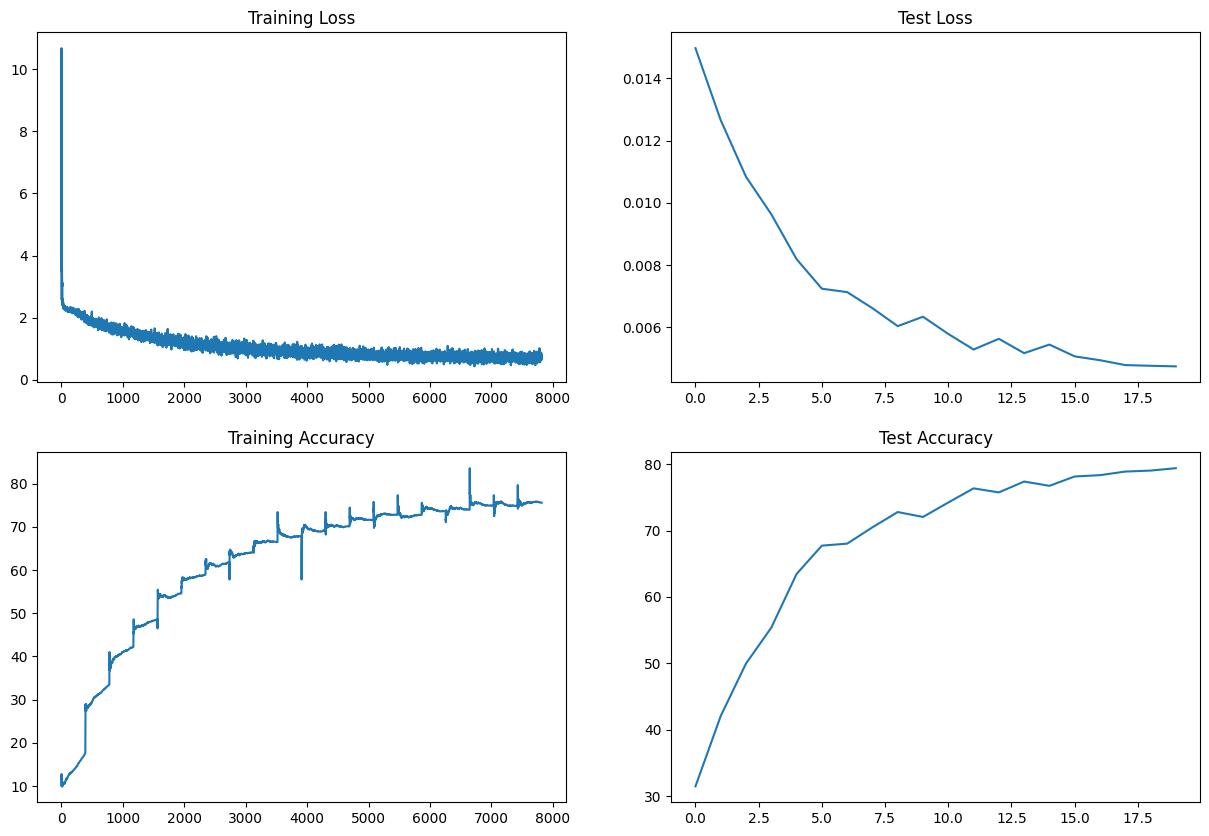

In [8]:
helpers.plot_metrics(train_acc, train_losses, test_acc, test_losses)

## Misclassified Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 2060


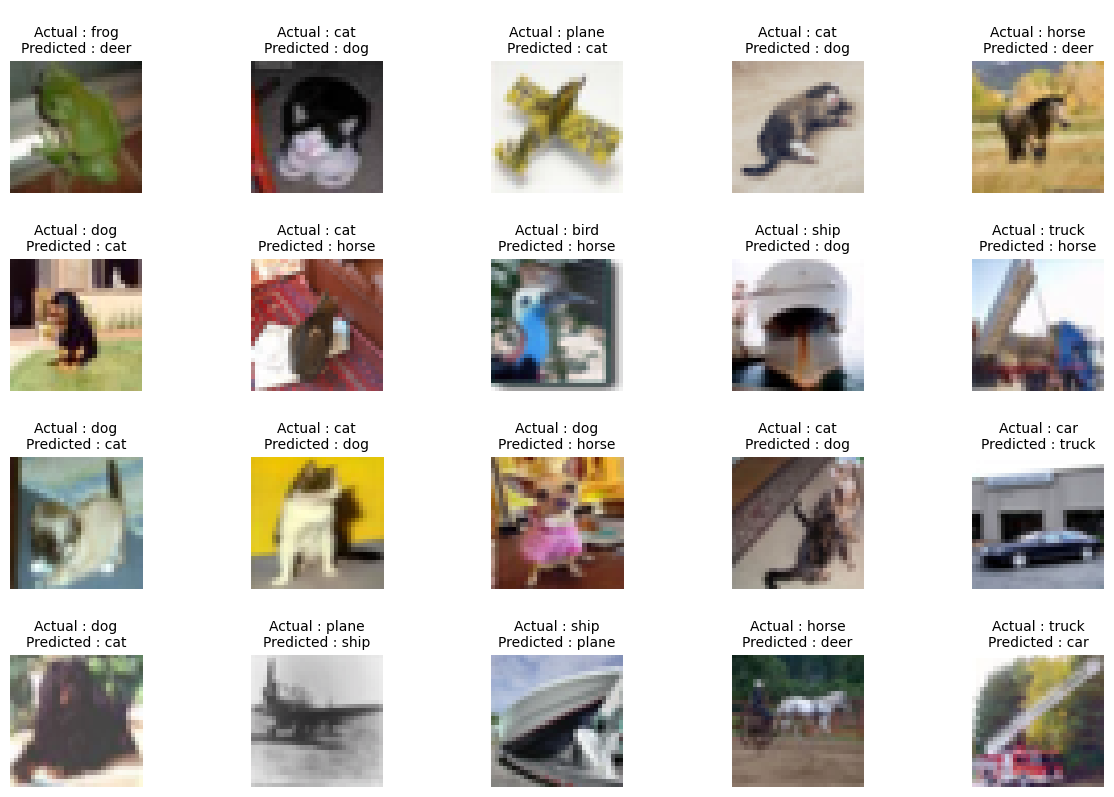

In [9]:
misclassified_images = helpers.wrong_predictions(model, testloader, device)
helpers.plot_misclassified(misclassified_images, mean, std, 20)

## Gradcam

/home/shivam13juna/Documents/virtual_envs/mlo/lib/python3.10/site-packages/torch/nn/modules/module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Generating Grad-CAM @layer4


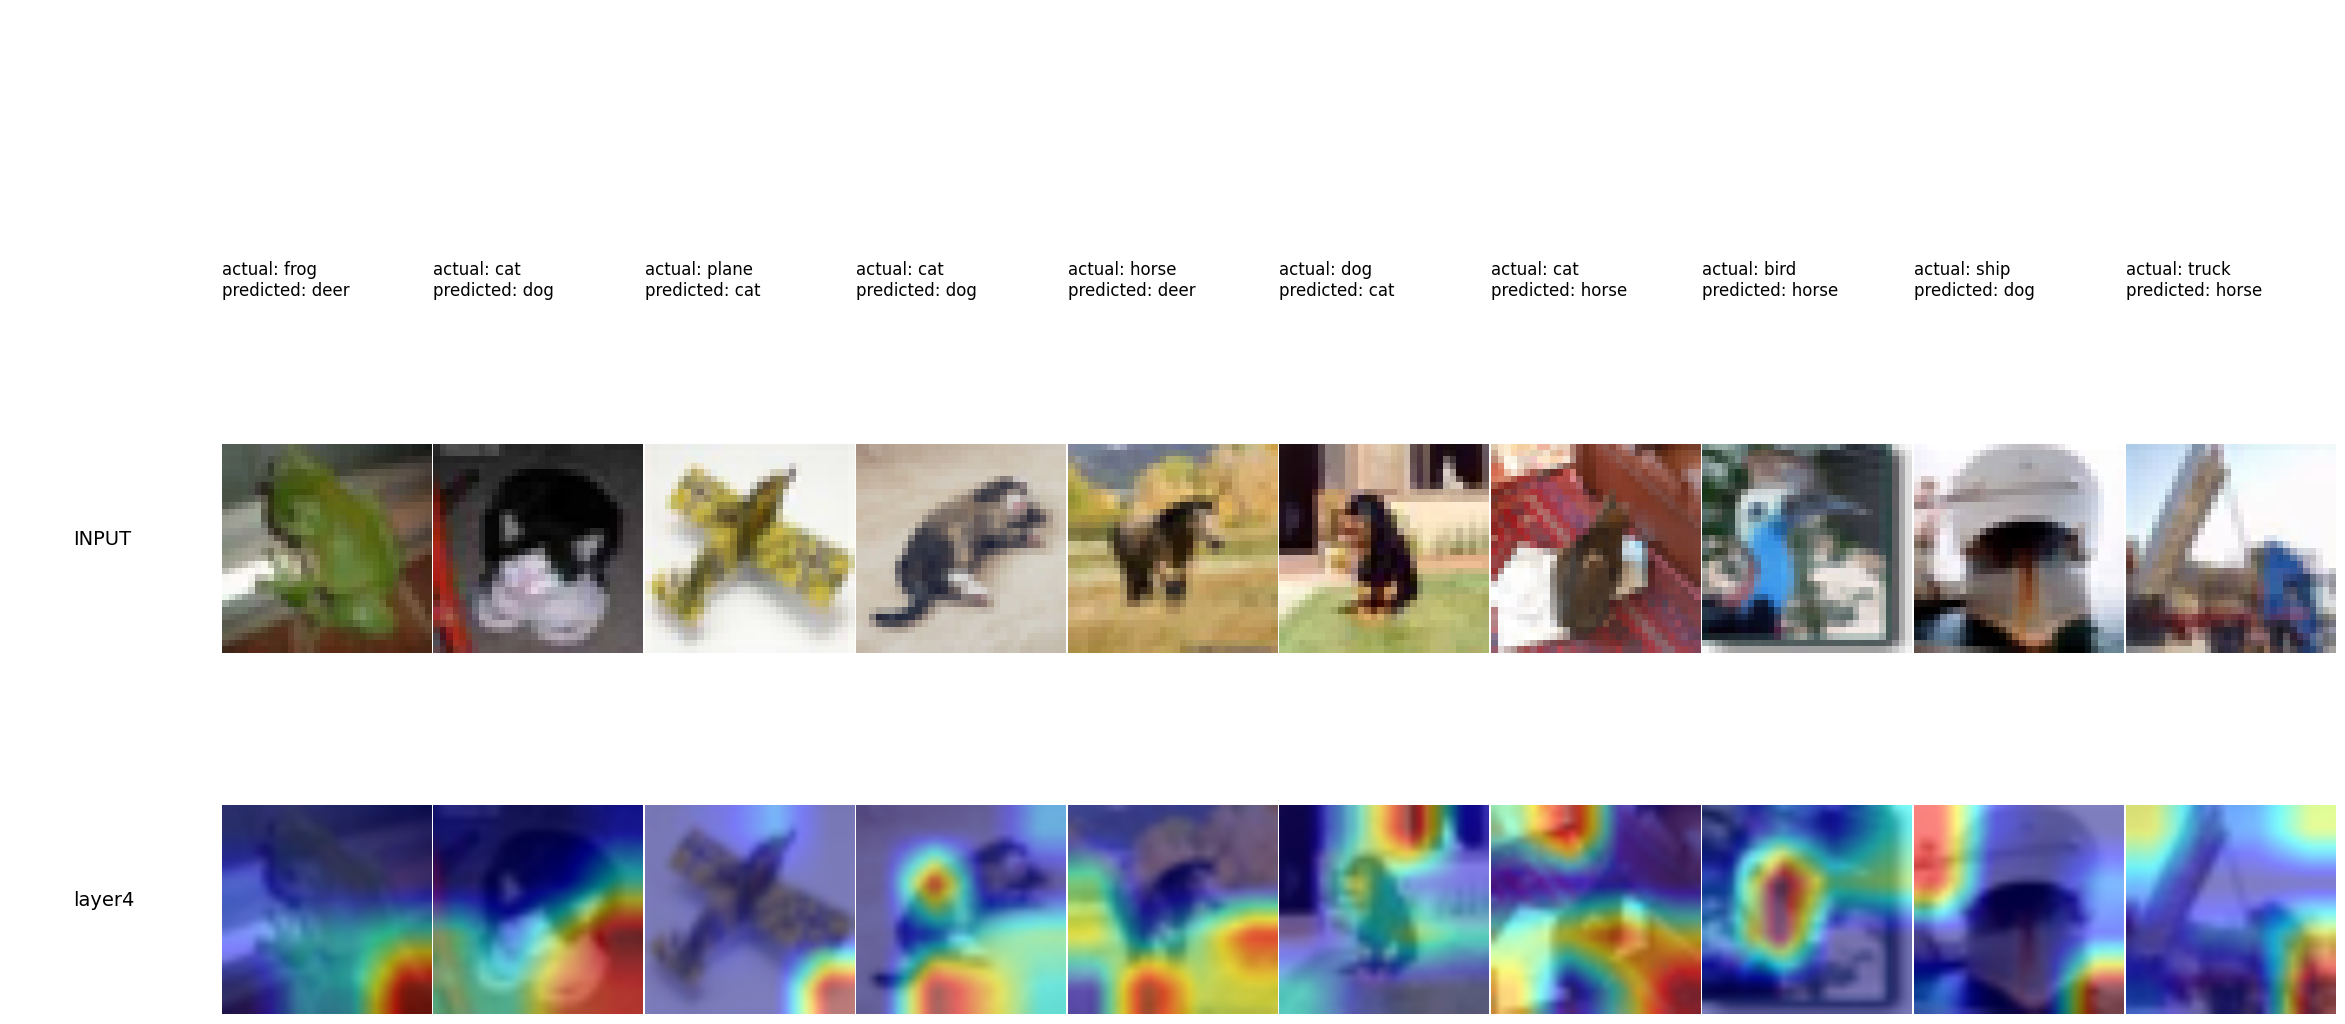

In [10]:
target_layers = ["layer4"]
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
gradcam_output, probs, predicted_classes = gradcam.generate_gradcam(misclassified_images[:10], model, target_layers, device)
gradcam.plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, misclassified_images[:10], mean, std)